[Table of Contents](table_of_contents.ipynb)

# Chapter 1.  The Unit Circle $S^1$: Kinematics, Control, and Estimation

1. [Definitions and Notation](#Definitions-and-Notation)
1. [Kinematics](#Kinematics)
  - [Exponential and Logarithmic Maps](#Exponential-and-Logarithmic-Maps)
1. [Optimization](#Optimization)
1. [Differential Equation Solvers](#Differential-Equation-Solvers)
1. [PID Control](#PID Control)
1. [Optimal Control on SO(2)](#Optimal Control on SO(2))
1. [Estimation](#Estimation)

## Definitions and Notation

We begin the study of Lie Groups and Lie Algebras by studying differential equations defined on the unit circle in $\mathbb{R}^2$.  Note that the unit circle in $\mathbb{R}^2$ is a one dimensional manifold embedded in the two dimensional Euclidean space $\mathbb{R}^2$. Two spaces are said to be isomorphic if there is a differentiable one-to-one mapping between elements in each space.  Note that $\mathbb{R}^2$ is isomorphic to the complex plane $\mathbb{C}$ by equating the $x$-axis with the real line and the $y$-axis with the imaginary line.  In $\mathbb{R}^2$ the unit circle is given by $S^1 = \{ (x_1, x_2)\in\mathbb{R}^2: x_1^2+x_2^2=1\}$.  In the complex plane, the unit circle is the set $S^1 = \{z\in\mathbb{C}: |z|=1\}$.  Since any complex number $z\in\mathbb{C}$ can be written in rectangular form as $z=a+jb$ and in polar form as $z=me^{j\theta}=m\cos\theta +jm\sin\theta$, the unit circle can be alternatively represented as $S^1 = \{e^{j\theta}\in\mathbb{C}: \theta\in(-\pi, pi]\}$.

Define the set of 2x2 matrices $\mathcal{M} = \left\{\begin{pmatrix} a & -b \\ b & a\end{pmatrix}: a,b \in \mathbb{R} \right\}\subset \mathbb{R}^{2\times 2}$.  It is clear that the complex plane $\mathbb{C}$ is isomorphic to $\mathcal{M}$ since for every complex number $z=a+jb$ there is unique element in $\mathcal{M}$, and visa versa.  It turns out that multiplying complex numbers is equivalent to matrix multiplication over $\mathcal{M}$. As can be seen from simple algebra:
\begin{align*}
(a+jb)(c+jd) &= (ac-bd) + j(bc+ad) \\
\begin{pmatrix} a & -b \\ b & a \end{pmatrix} \begin{pmatrix} c & -d \\ d & c \end{pmatrix} &= \begin{pmatrix} ac-bd & -(bc+ad) \\ (bc+ad) & ac-bd \end{pmatrix}
\end{align*}

In fact, define $I=\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\subset\mathcal{M}$ and $J=\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}\subset\mathcal{M}$ and note that $I^2=I$, $IJ=JI=J$ and $J^2=-I$.  Therefore $I$ acts like the complex number $1$, and $J$ acts like the complex number $j=\sqrt{-1}$.  Any element of $\mathcal{M}$ can be written as $aI+bJ$ in the same way that any element of the complex plane $\mathbb{C}$ can be written as $a+jb$.


The unit circle embedded in the complex plane is given by the set $S^1=\{ z\in\mathbb{C}: |z|=1\}$.  Similarly, the unit circle embedded in the set of $2\times 2$ matrices $\mathbb{R}^{2\times 2}$ is given by $S^1=\{G\in\mathcal{M}: \det{G}=1\}$.  

For example, the point $x=(1/\sqrt{2}, 1/\sqrt{2})^\top$ represent a point on the unit circle in $\mathbb{R}^2$ that is equivalent to the representation $z=e^{j\frac{\pi}{4}}$ in $\mathbb{C}$, that is equivalent to the representation $G=\begin{pmatrix}\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{pmatrix}$ in $\mathbb{R}^{2\times 2}$.

Therefore, we can talk of embeddings 
\begin{align*}
\pi_1: S^1 &\rightarrow \mathbb{R}^2, \\
\pi_2: S^1 &\rightarrow \mathbb{C}, \\
\pi_3: S^1 &\rightarrow \mathbb{R}^{2\times 2}.
\end{align*}


A matrix $R$ is said to be orthgonal if $R^\top R = RR^\top = I$.  The set of $2\times 2$ orthogonal matrices is denoted $O(2)$.  Orthogonal matries can have determinant equal to $\pm 1$.  The set of orthogonal matrices with determinant equal to 1 is denoted $SO(2)$ and is the called the special orthogonal group.  It is fairly straight forward to show that $SO(2)=\{G\in\mathcal{M}: det(G)=1\}$ and is therefore isomorphic to $S^1$.

The following code establishes a class for $S^1$.  We will use matrices in $\mathbb{R}^{2\times 2}$ as the native representation for elements of $S^1$ and provide functions that convert between the representations.  Since $S^1$ is isomorphic to $SO(2)$ and since we will generalize $SO(3)$ later, the discussion that follows will focus on $SO(2)$.

In [1]:
%matplotlib inline
import random

import numpy as np
import matplotlib.pyplot as plt

class lie_group_SO2:
    # this class will be used to define operations on SO2
    def __init__(self, G=np.eye(2)):
        self.mat = G
    
    # generate a random element in SO2
    def gen_random_element(self):
        th = random.uniform(-np.pi, np.pi)
        self.mat = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
    
    # functions that convert between representations
    def vector(self):
        return self.mat[:,0]

    def complex(self):
        return self.mat[0,0] + self.mat[1,0]*1j   
    
    def magPhase(self):
        mag = np.sqrt(self.mat[0,0]**2 + self.mat[1,0]**2)
        phase = np.arctan2(self.mat[1,0], self.mat[0,0])
        return mag, phase
    

The following code tests these functions.

In [2]:
G1 = lie_group_SO2()
G1.gen_random_element()
print('G=', G1.mat)
x = G1.vector()
print('x=', x)
z = G1.complex()
print('z=', z)
mag, phase = G1.magPhase()
print('mag = ', mag, ', phase = ', 2*np.pi*phase, 'deg')

('G=', array([[ 0.21942663, -0.975629  ],
       [ 0.975629  ,  0.21942663]]))
('x=', array([0.21942663, 0.975629  ]))
('z=', (0.21942662963487877+0.9756290043900282j))
('mag = ', 1.0, ', phase = ', 8.479595807633116, 'deg')


In mathematics, a group is defined as a set of objects $\mathcal{G}$ that contains a unique element $I\in\mathcal{G}$ called the identity, and an operation $\cdot$ such that 
*  $G_1, G_2 \in \mathcal{G}$ implies that $G_1\cdot G_2 \in \mathcal{G}$,
*  For every $G\in\mathcal{G}$ there exists and element $H\in\mathcal{G}$ such that $G\cdot H = H\cdot G = I$.  $H$ is called the inverse of $G$ and will be denoted as $G^{-1}$.

The first item implies that $\mathcal{G}$ is closed under the $\cdot$ operation.  The second item implies that every element in $\mathcal{G}$ has an inverse.

For $S^1$, the $\cdot$ operator is defined differently depending on the space into which it is embedded.  For example, in $\mathbb{C}$, let $z_1=e^{j\theta_1}$ and $z_2=e^{j\theta^2}$, then clearly 
\begin{equation}
z = z_1 z_2 = e^{j\theta_1} e^{j\theta_2} = e^{j(\theta_1+\theta)}
\end{equation}
is an element of $S^1$, and if $z=1+j0$ is the identity, then the inverse operator is simply the complex conjugate since
\begin{equation}
z\bar{z} = e^{j\theta} e^{-j\theta} = e^{j(\theta-\theta)} = e^{j0} = 1.
\end{equation}

On the other hand, if $S^1$ is embedded in $\mathbb{R}^{2\times 2}$, and the identity is defined as the identity matrix, then the $\cdot$ operator is simply matrix multiplication since
\begin{align*}
G_1 G_2 &= \begin{pmatrix} \cos(\theta_1) & -\sin(\theta_1) \\ \sin(\theta_1) & \cos(\theta_1) \end{pmatrix}
\begin{pmatrix} \cos(\theta_2) & -\sin(\theta_2) \\ \sin(\theta_2) & \cos(\theta_2) \end{pmatrix} \\
&= \begin{pmatrix} \cos(\theta_1)\cos(\theta_1)-\sin(\theta_1)\sin(\theta_2) & -\cos(\theta_1)\sin(\theta_2)-\sin(\theta_1)\cos(\theta_2) \\ \cos(\theta_1)\sin(\theta_2)+\sin(\theta_1)\cos(\theta_2) & \cos(\theta_1)\cos(\theta_1)-\sin(\theta_1)\sin(\theta_2) \end{pmatrix} \\
&= \begin{pmatrix} \cos(\theta_1+\theta_2) & -\sin(\theta_1+\theta_2) \\ \sin(\theta_1+\theta_2) & \cos(\theta_1+\theta_2) \end{pmatrix}
\end{align*}
and the inverse of $G\in\mathcal{G}$ is given by the matrix inverse since $GG^{-1}=I$.  

It should be clear that if $S^1$ is embedded in $\mathbb{R}^2$ the $\cdot$ and inverse operators are much more complex.  Since operations on the group $S^1$ can be carried out with matrix operations, the most convenient representation will be in $\mathbb{R}^{2\times 2}$.   (Actually, $\mathbb{C}$ is convenient for $S^1$ but does not extend to other groups, whereas matrix operations will extend to other groups useful in robotics.)

We can expand the python class to include an identity, the dot and the inverse operator.

In [3]:
class lie_group_SO2(lie_group_SO2):
    
    # compose (multiply) two elements in SO2
    def dot(self, G1):
        return np.dot(self.mat, G1)
    
    # return the identity element
    def identity():
        return np.eye(2)

    # return the inverse of an element in SO(2)
    def inverse(self):
        return self.mat.T

The following lines test the code.

In [4]:
G = lie_group_SO2()
G.gen_random_element()
print('G=', G.mat)
print('G^{-1}=', G.inverse())
G1 = lie_group_SO2()
G1.gen_random_element()
print('G*G1=', G.dot(G1.mat))

('G=', array([[-0.03528437,  0.99937731],
       [-0.99937731, -0.03528437]]))
('G^{-1}=', array([[-0.03528437, -0.99937731],
       [ 0.99937731, -0.03528437]]))
('G*G1=', array([[-0.97713668, -0.21261209],
       [ 0.21261209, -0.97713668]]))


## Kinematics

From the above discussion, it is clear that $G\in SO(2)$ implies that $G=\begin{pmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}$.  Suppose now that $\theta\equiv\theta(t)$ is a function of time, then
\begin{equationa
G(t) = \begin{pmatrix} \cos\theta(t) & -\sin\theta(t) \\ \sin\theta(t) & \cos\theta(t)\end{pmatrix}.
\end{equation*}

Taking the derivative with respect to time we get
\begin{align}
\dot{G} &= \begin{pmatrix} -\dot{\theta}\sin\theta & -\dot{\theta}\cos\theta \\ \dot{\theta}\cos\theta & -\dot{\theta}\sin\theta \end{pmatrix} \\
&= \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} 
   \begin{pmatrix} 0 & -\dot{\theta} \\ \dot{\theta} & 0 \end{pmatrix} \\
&= G\dot{\theta}^\wedge,
\end{align}
where we define
\begin{equation*}
\dot{\theta}^\wedge = \begin{pmatrix} 0 & -\dot{\theta} \\ \dot{\theta} & 0 \end{pmatrix} = J\dot{\theta}.
\end{equation*}

The kinematic equation of motion on $SO(2)$ is therefore given by $\dot{G} = G\dot{\theta}^{\wedge}$

Note that in $\mathbb{R}^2$, the tangent to the unit circle at the point $(1,0)$ is a vertical line given by $\ell = \{\sigma\begin{pmatrix} 0 \\ 1\end{pmatrix}: \sigma\in\mathbb{R}\}$.

(-3, 3, -3, 3)

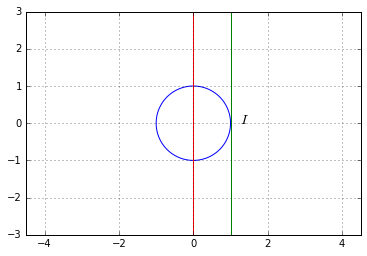

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
S = 3
tangent_plane = np.column_stack((np.ones(100), np.linspace(-S, S, 100))) 
plt.plot(tangent_plane[:,0], tangent_plane[:,1])
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
plt.plot(lie_alg[:,0], lie_alg[:,1], color='red')
plt.text(1.25, 0, '$I$', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.axis((-S, S, -S, S))

The tangent plane is shown in orange and the Lie algebra, which is a subspace of $\mathbb{R}^2$ is shown in red.  When $G$ is not the identity, then the tangent plane and its tangent space is shown in the plot below.  Note that the tangent space is a rotated (transformed) version of the Lie algebra.

(-3, 3, -3, 3)

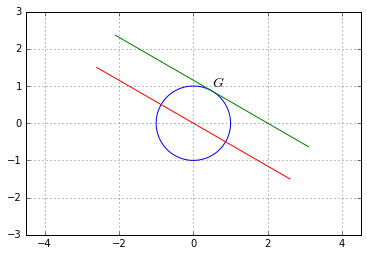

In [6]:
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
S = 3
th = 60*np.pi/180.
G = np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])
tangent_plane = np.column_stack((np.ones(100), np.linspace(-S, S, 100))) 
tangent_plane = np.dot(G, tangent_plane.T).T
plt.plot(tangent_plane[:,0], tangent_plane[:,1])
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
tangent_space = np.dot(G, lie_alg.T).T
plt.plot(tangent_space[:,0], tangent_space[:,1], color='red')
plt.text(0.5, 1.0, '$G$', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.axis((-S, S, -S, S))

In the complex plane $\mathbb{C}$, the tangent to $S^1$ at the identity $z=1+0j$ is the vertical line $\ell = \{ \sigma j: \sigma\in\mathbb{R}\}$.  In the set of $2\times 2$ matrices, the tangent to $S^1=SO(2)$ at the identity $G=I$ is the vertical line $\ell = \{\sigma\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}: \sigma\in\mathbb{R}\} = \{\sigma J: \sigma\in\mathbb{R}\}$.  


The tangent space at the identity $G=I$ is called the Lie Algebra.  

The Lie algebra of $SO(2)$ will be denoted ${\mathfrak so}(2)$ and in $\mathbb{R}^{2\times 2}$ is given by
\begin{equation}
{\mathfrak so}(2) = \{ \sigma J: \sigma\in\mathbb{R}\}
\end{equation}

In $\mathbb{R}^{2\times 2}$, the Lie bracket is the standard matrix Lie bracket defined as $[A,B]=AB-BA$, where $A,B\in so(2)$.  Note that since $A,B\in so(2)$ that we can write $A=aJ$ and $B=bJ$ and therefore
\begin{align*}
[A,B] &= AB - BA \\
      &= (aJ)(bJ)-(bJ)(aJ) \\
      &= (-abI) - (-baI)\\
      &= 0.
\end{align*}
Therefore, the Lie bracket on $so(2)$ is always zeros.  Lie groups whose Lie bracket is always zero are called Abelian Lie groups.

Note that the tangent space at an element that is not equal to identity, is just a transformed version of the Lie algebra ${\mathfrak so}(2)$.  Since $\dot{G}=G\omega^{\wedge}$, the tangent space at G is $G\omega^{\wedge}=GJ\omega$.  

### Exponential and Logarithmic Maps
We have shown that the kinematic equation of motion on $SO(2)$ can be written as 
\begin{equation}
\dot{G} = G\omega^\wedge.
\end{equation}
Rearranging we get $\dot{G}-G\omega^\wedge=0$.  Multiplying both sides of the equation by the integrating factor $e^{-\omega^\wedge}$ gives
\begin{equation}
(\dot{G} - G\omega^\wedge)e^{-\omega^\wedge} = 0,
\end{equation}
which implies that 
\begin{equation}
\frac{d}{dt}Ge^{-\omega^\wedge} = 0.
\end{equation}
Integrating both sides from $0$ to $t$ gives
\begin{equation}
G(t) = G(0)e^{\omega^\wedge t}.
\end{equation}
Since $\omega^\wedge t = J\omega t$, the exponential function maps the Lie algebra ${\mathfrak so}(2)$ to the Lie group $SO(2)$.  

For $SO(2)$ there is a simple formula for the exponential map $e^{J\sigma}$ since $J^2=-I$ we have
\begin{align*}
e^{J\sigma} &= I + J\sigma + \frac{1}{2!}J^2\sigma^2 + \frac{1}{3!}J^3\sigma^3 + \frac{1}{4!}J^4\sigma^4 + \cdots \\
&=(1-\frac{1}{2!}\sigma^2 + \frac{1}{4!}\sigma^4 + \cdots)I + (\sigma - \frac{1}{3!}\sigma^3 + \frac{1}{5!}\sigma^5+\cdots)J \\
&=\cos\sigma I + \sin\sigma J \\
&=\begin{pmatrix}\cos\sigma & -\sin\sigma \\ \sin\sigma & \cos\sigma \end{pmatrix}.
\end{align*}
Therefore the map $exp: {\mathfrak so}(2)\rightarrow SO(2)$ is periodic and is not one-to-one.

On the other hand, the logarithm maps the Lie group to the Lie algebra as $\log:SO(2)\rightarrow {\mathfrak so}(2)$ and is defined as
\begin{equation}
\log\begin{pmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} = (\theta + 2\pi n)J.
\end{equation}
Alternatively, we could write
\begin{equation}
\log(G) = (\vartheta + 2\pi n)J, \quad \text{where} \quad \vartheta = \tan^{-1}\left(\frac{G_{21}}{G_{11}}\right).
\end{equation}
We can add Python methods implement the logarithmic and exponential maps.



In [7]:
class lie_group_SO2(lie_group_SO2):
    
    # Exponential of g in so(2)
    def exp(self, g):
        # check to see of g is in so(2)
        if np.linalg.norm(g+g.T)<.000001:
            th = g[1,0]
            G = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
            return G
        else:
            print('g is not in so(2)')
    
    # log of G in SO(2)
    def log(self):
        # check to see if G is in SO(2)
        if np.linalg.norm(np.dot(self.mat, self.mat.T)-np.eye(2))<.000001:
            varphi = np.arctan2(self.mat[1,0],self.mat[0,0])
            g = np.array([[0, -varphi], [varphi, 0]])
            return g
        else:
            print('G is not in SO(2)')


In [8]:
# generate a random element in SO(2)
G = lie_group_SO2()
G.gen_random_element()
print('G=', G.mat)
# map to so(2) through the log
g = G.log()
print('g=', g)
# map back to SO(2) through the exp
H = G.exp(g)
print('H=', H)



('G=', array([[-0.84487904, -0.5349574 ],
       [ 0.5349574 , -0.84487904]]))
('g=', array([[ 0.        , -2.57713533],
       [ 2.57713533,  0.        ]]))
('H=', array([[-0.84487904, -0.5349574 ],
       [ 0.5349574 , -0.84487904]]))


## Optimization (Gradient Descent) on $S^1$

This section follows http://www.seas.upenn.edu/~cjtaylor/PUBLICATIONS/pdfs/TaylorTR94b.pdf

Suppose that a camera is rotated in place by an able of $\theta$ and collects a set of corresponding points at both orientations.  Let $\{\mathbf{p}_i^0\}_{i=1}^N$ and $\{\mathbf{p}_i^1\}_{i=1}^N$ be the corresponding points in frame $0$ and frame $1$, as shown in the figure below for a single point.

<img src="files/rotation_optimization.png" width="300">

Let $R\in SO(2)$ be the rotation matrix from frame $0$ to frame $1$.  Then, we should have that $\mathbf{p}^1 = R\mathbf{p}^0$.  Since the inner product $<x, y> = y^\top x$ is maximized when $x=y$, we have that $<R\mathbf{p}^0, \mathbf{p}^1> = (\mathbf{p}^1)^\top R \mathbf{p}^0$ is maximized over all $R$ when $R$ is the correct rotation matrix. 

If the corresponding image points have noise, then the objective may be to solve the following optimization problem:
\begin{equation} \label{eq:opt_S1}
R^\ast = \arg\max_R \sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R \mathbf{p}_i^0 \right]^2.
\end{equation}

Equation \eqref{eq:opt_S1} is an example of an optimization problem over $SO(2)$.

We will show how to construct a Gauss-Newton iteration algorithm to solve this optimization problem.  The basic idea is to parameterize the rotation matrix $R\in SO(2)$ at the $k^{th}$ iteration as 
\begin{equation}
R_k = R_{k-1} e^{J\omega_k}.
\end{equation}
The cost function can then be written as 
\begin{align}
V(\omega_k) &= \sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]^2 \\
    &\approx V(0) + \left(\frac{\partial V}{\partial \omega_k}\Big|_{\omega_k=0}\right)^\top \omega_k + \omega_k^\top \left(\frac{\partial^2 V}{\partial \omega_k^2}\Big|_{\omega_k=0}\right)\omega_k.
    \label{eq:cost_quadratic_approx}
\end{align}
The Guauss-Newton step that maximizes \eqref{eq:cost_quadratic_approx} is therefore
$$
\omega_k = \frac{\gamma}{2} \left(\frac{\partial^2 V}{\partial \omega_k^2}\Big|_{\omega_k=0}\right)^{-1}\left(\frac{\partial V}{\partial \omega_k}\Big|_{\omega_k=0}\right),
$$
where
\begin{align*}
\frac{\partial V}{\partial \omega_k}\Big|_{\omega_k=0} &= 
\frac{\partial }{\partial \omega_k}\Big|_{\omega_k=0}\left[\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]^2 \right] \\
&= 2\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} \mathbf{p}_i^0 \right] \\
&= 2\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}J \mathbf{p}_i^0 \right]
\end{align*}
since
\begin{align*}
\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} &=
\frac{\partial }{\partial \omega_k}\Big|_{\omega_k=0}\left[I + J\omega_k + \frac{1}{2!}J^2\omega_k^2 + \cdots \right] \\
&= \left[J + J^2\omega_k + \frac{1}{2!}J^3\omega_k^2\right]_{\omega_k=0} \\
&= Je^{J\omega_k}\Big|_{\omega_k=1} = J
\end{align*}
and
\begin{align*}
\frac{\partial^2 V}{\partial \omega_k^2}\Big|_{\omega_k=0} &= 
\frac{\partial }{\partial \omega_k}\Big|_{\omega_k=0}\left[2\sum_{i=1}^N \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}Je^{J\omega_k} \mathbf{p}_i^0 \right] \right]\\
&= 
2\sum_{i=1}^N \left\{ \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}J\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} \mathbf{p}_i^0 \right] + \left[ (\mathbf{p}_i^1)^\top R_{k-1}\frac{\partial e^{J\omega_k}}{\partial \omega_k}\Big|_{\omega_k=0} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}Je^{J\omega_k} \mathbf{p}_i^0 \right] \right\} \\
&= 
2\sum_{i=1}^N \left\{ \left[ (\mathbf{p}_i^1)^\top R_{k-1}e^{J\omega_k} \mathbf{p}_i^0 \right]  \left[ (\mathbf{p}_i^1)^\top R_{k-1}J^2 \mathbf{p}_i^0 \right] + \left[ (\mathbf{p}_i^1)^\top R_{k-1}J \mathbf{p}_i^0 \right]^2\right\}.
\end{align*}




## Optimization on $SO\left(2\right)$ 

Suppose we have ground robot equipped with some kind of sensor like
a LIDAR or Intel RealSense camera that can measure direction and distance
measurements to landmarks as shown in the following figure. Using
these measurements, we can estimate the unknown rotation and translation
by optimization between measurements. The $i^{th}$ landmark vector
measured in frame $b$ is defined in terms of the frame $a$ measurement
by

\begin{equation}
{\bf l}_{i}^{b}=R_{a}^{b}{\bf l}_{i}^{a}+{\bf t}^{b},
\end{equation}
where ${\bf t}^{b}$ is the robot translation from frame $a$ to frame
$b$ in frame $b$ and $R_{a}^{b}$ is the passive rotation from frame
$a$ to frame $b$. Likewise, the $i^{th}$ landmark measurement in
frame $a$ may given in terms of the frame $b$ measurement by

\begin{equation}
{\bf l}_{i}^{a}=\left(R_{a}^{b}\right)^{\top}\left({\bf l}_{i}^{b}-{\bf t}^{b}\right).
\end{equation}

The residual error due to rotation and translation of the $i^{th}$
landmark may be given by moving everything to one side of either of
the previous two equations and pre-multiplying by itself to get a
scalar. There could be a nice way to combine these two error equations
because the error may differ between them, but we'll just pick one
for now. We will use the first because its derivatives are slightly
more simple, which gives the residual error

\begin{equation}
r_{i}=\frac{1}{2}{\bf e}^{\top}{\bf e},
\end{equation}
where

\begin{equation}
{\bf e}={\bf l}_{i}^{b}-R_{a}^{b}{\bf l}_{i}^{a}-{\bf t}^{b}.
\end{equation}

Since each landmark measurement is noisy, we can treat this as a nonlinear
least squares problem and solve for the rotation and translation that
gives us the lowest square error over all of the landmark measurements
with the Gauss-Newton algorithm. To do this, we need the Jacobian
of the residual error with respect to each variable. The derivative
of the residual error w.r.t. translation is straightforward and is
given by

\begin{equation}
\frac{\partial r_{i}}{\partial{\bf t}^{b}}={\bf e}^{\top}\frac{\partial{\bf e}}{\partial{\bf t}^{b}},
\end{equation}
where

\begin{equation}
\frac{\partial{\bf e}}{\partial{\bf t}^{b}}=-I.
\end{equation}
We can find the derivatives with respect to change in rotation on
the manifold by taking limits. Elements of $SO\left(2\right)$ are
not vectors, so we cannot directly perform addition with them. Let's
define a new type of addition operator by 

\begin{align}
\boxplus & :SO\left(2\right)\times\mathbb{R}^{1}\rightarrow SO\left(2\right),\\
R\boxplus\delta & =\exp\left(-\delta^{\times}\right)R,
\end{align}
where

\begin{equation}
\delta^{\times}=\begin{bmatrix}0 & -\delta\\
\delta & 0
\end{bmatrix}.
\end{equation}

The derivative w.r.t. rotation of the error is then given by

\begin{equation}
\frac{\partial r_{i}}{\partial R}={\bf e}^{\top}\frac{\partial{\bf e}}{\partial R},
\end{equation}
where

\begin{align}
\frac{\partial{\bf e}}{\partial R} & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[\left({\bf l}_{i}^{b}-\left(R_{a}^{b}\boxplus\epsilon\right){\bf l}_{i}^{a}+{\bf t}^{b}\right)-\left({\bf l}_{i}^{b}-R_{a}^{b}{\bf l}_{i}^{a}+{\bf t}^{b}\right)\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-\left(\exp\left(-{\bf 1}^{\times}\epsilon\right)R_{a}^{b}\right){\bf l}_{i}^{a}+R_{a}^{b}{\bf l}_{i}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-\left(\left(I-{\bf 1}^{\times}\epsilon\right)R_{a}^{b}\right){\bf l}_{i}^{a}+R_{a}^{b}{\bf l}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-\left(R_{a}^{b}-{\bf 1}^{\times}R_{a}^{b}\epsilon\right){\bf l}_{i}^{a}+R_{a}^{b}{\bf l}_{i}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[-R_{a}^{b}{\bf l}_{i}^{a}+{\bf 1}^{\times}R_{a}^{b}{\bf l}_{i}^{a}\epsilon+R_{a}^{b}{\bf l}_{i}^{a}\right]\\
 & =\lim_{\epsilon\rightarrow0}\frac{1}{\epsilon}\left[{\bf 1}^{\times}R_{a}^{b}{\bf l}_{i}^{a}\epsilon\right]\\
 & ={\bf 1}^{\times}R_{a}^{b}{\bf l}_{i}^{a}.
\end{align}

The Gauss-Newton algorithm is explained well on its wikipeida page https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm. Gauss-Newton can give us an update vector for $N$ landmark measurement
matches between frames by

\begin{equation}
\boldsymbol{\delta}=-\left(J^{\top}J\right)^{-1}J^{\top}{\bf r},
\end{equation}
where

\begin{align}
J & =\begin{bmatrix}\frac{\partial r_{1}}{\partial R} & \frac{\partial r_{1}}{\partial t_{x}} & \frac{\partial r_{1}}{\partial t_{y}}\\
\vdots & \vdots & \vdots\\
\frac{\partial r_{N}}{\partial R} & \frac{\partial r_{N}}{\partial t_{x}} & \frac{\partial r_{N}}{\partial t_{y}}
\end{bmatrix}\\
{\bf r} & =\begin{bmatrix}r_{1} & \cdots & r_{N}\end{bmatrix}^{\top}.
\end{align}
The rotation estimate is updated with the first element of $\boldsymbol{\delta}$
and translation with the second two elements by

\begin{align}
R_{n+1} & =R_{n}\boxplus\delta_{1}\\
{\bf t}_{n+1} & ={\bf t}_{n}+\begin{bmatrix}\delta_{2}\\
\delta_{3}
\end{bmatrix}.
\end{align}

Levenberg-Marquardt optimization is a mix of Gauss-Newton and Gradient Descent because it introduces a scaling factor to adjust the step size during optimization. This prevents the optimization from getting hung up or stuck in oscillation patterns, which occurs in our Gauss-Newton optimization below. Refer to https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm for more details.


Number of Gauss-Newton iterations:        99
Number of Levenberg-Marquardt iterations: 28

Gauss-Newton rotation error:        0.007392
Levenberg-Marquardt rotation error: 0.002217

Gauss-Newton translation error:        0.036349
Levenberg-Marquardt translation error: 0.025593


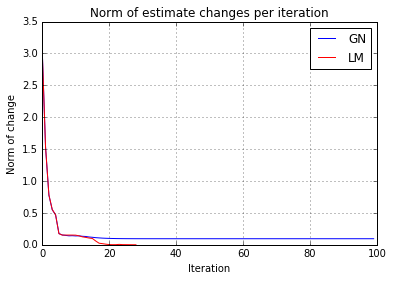

In [9]:
# Comparison of Gauss-Newton and Levenberg-Marquardt on SO(2)
from numpy import array, vstack, sin, cos, eye, zeros, arccos
from numpy.linalg import pinv, norm
from numpy.random import randn, seed
%matplotlib inline
import matplotlib.pyplot as plt

# use fixed random seed for to compare results against same values
seed(0)

def skew(a):
    return array([[0,-a],[a,0]])

def R(theta):
    return array([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]])

def expSO2(delta):
    return array([[cos(delta),-sin(delta)],[sin(delta),cos(delta)]])

def err(R,t,la,lb):
    return lb - R.dot(la) - t

def rerr(e):
    return 0.5*e.transpose().dot(e)

# Gauss-Newton algorithm
def GN(R0,t0,la,lb):
    Rhat = R0.copy()
    that = t0.copy()
    onex = skew(1.)
    delta_hist = []
    for i in range(100):
        rlist = []
        J = zeros([N,3])
        for j in range(la.shape[1]):
            # residual
            e = err(Rhat,that,la[:,j:j+1],lb[:,j:j+1])
            rlist += [rerr(e)]

            # jacobian
            J[j,0] = e.transpose().dot(onex.dot(Rhat).dot(la[:,j:j+1]))
            J[j,1:] = -e.transpose()
        r = vstack(rlist)

        # update estimates
        delta = -pinv(J).dot(r)
        Rhat = expSO2(-delta[0,0]).dot(Rhat)
        that += delta[1:,0:1]

        # stop iterations when change is small
        delta_mag = norm(delta)
        delta_hist += [delta_mag]
        if delta_mag < 1e-3: break
    return i,Rhat,that,delta_hist

# Levenberg-Marquardt algorithm
def LM(R0,t0,la,lb):
    Rhat = R0.copy()
    that = t0.copy()
    onex = skew(1.)
    delta_hist = []
    lam = 0.1
    new_J = True
    r2 = 0.
    J = zeros([N,3])
    H = zeros([3,3])
    for i in range(100):
        if new_J:
            rlist = []
            for j in range(N):
                # residual
                e = err(Rhat,that,la[:,j:j+1],lb[:,j:j+1])
                rlist += [rerr(e)]

                # jacobian
                J[j,0] = e.transpose().dot(onex.dot(Rhat).dot(la[:,j:j+1]))
                J[j,1:] = -e.transpose()
            r = vstack(rlist)
            H = J.transpose().dot(J)
            if i == 0:
                r2 = r.transpose().dot(r)[0,0]

        # dampen the Hessian
        H_damped = H + lam*eye(3)

        # update estimates
        delta = -pinv(H_damped).dot(J.transpose()).dot(r)
        Rnew = expSO2(-delta[0,0]).dot(Rhat)
        tnew = that + delta[1:,0:1]

        # check squared error with new transform
        rlist = []
        for j in range(N):
            e = err(Rnew, tnew, la[:, j:j + 1], lb[:, j:j + 1])
            rlist += [rerr(e)]
        rnew = vstack(rlist)
        r2_new = rnew.transpose().dot(rnew)[0,0]

        # check new error against the old
        if r2_new < r2:
            lam /= 10.
            Rhat = Rnew.copy()
            that = tnew.copy()
            r2 = r2_new.copy()
            new_J = True
        else:
            lam *= 10.
            new_J = False

        # stop iterations when change is small
        delta_mag = norm(delta)
        delta_hist += [delta_mag]
        if delta_mag < 1e-3: break
    return i,Rhat,that,delta_hist

# landmarks, camera positions, camera attitudes
N = 100
lm = 2*randn(2,N)
pa = vstack([-10.,-3.])
pb = vstack([-9.,3.])
Ra = R(0.2)
Rb = R(-0.2)

# true camera rotation and translation
Rab = R(-0.4)
tab = Rb.dot(pa - pb)

# measurements from each camera
noise_stdev = 0.1
noise_a = noise_stdev*randn(2,N)
noise_b = noise_stdev*randn(2,N)
la = Ra.dot(lm - pa) + noise_a
lb = Rb.dot(lm - pb) + noise_b

# initial guesses
R0 = eye(2)
t0 = vstack([0.,0.])

# Gauss-Newton
gn_iters,R_gn,t_gn,gn_hist = GN(R0,t0,la,lb)
lm_iters,R_lm,t_lm,lm_hist = LM(R0,t0,la,lb)

# check error in rotations
vec = vstack([1,0])
vt = Rab.dot(vec)
vgn = R_gn.dot(vec)
vlm = R_lm.dot(vec)

print("\nNumber of Gauss-Newton iterations:        %d" % gn_iters)
print("Number of Levenberg-Marquardt iterations: %d" % lm_iters)

print("\nGauss-Newton rotation error:        %f" % arccos(vt.transpose().dot(vgn)))
print("Levenberg-Marquardt rotation error: %f" % arccos(vt.transpose().dot(vlm)))

print("\nGauss-Newton translation error:        %f" % norm(tab-t_gn))
print("Levenberg-Marquardt translation error: %f" % norm(tab-t_lm))

# plot norm of delta at each iteration
fig = plt.figure()
plt.plot(gn_hist,'b',label="GN")
plt.plot(lm_hist,'r',label="LM")
plt.title('Norm of estimate changes per iteration')
plt.grid(); plt.xlabel('Iteration'); plt.ylabel('Norm of change')
plt.legend()
plt.show()

## Differential Equation Solvers
In any implementation of time-varying systems, thought must be given to numerical integration methods for finding approximate solutions to differential equations. Typical algorithms include Euler's Method and Runge-Kutta Methods (i.e., RK4). However, these classical algorithms are developed for use on flat Euclidean spaces and numerical instability issues can arise when applied to curvy manifolds such as the Lie groups relevant to robotics. For these applications, numerical Lie group integrators can be used to improve stability&mdash;especially over long time windows and for slower sampling rates.

### Motivating Example
Consider the following motivating example. A pencil is spinning on a flat table. It's configuration space is $S^1$, which represents the space of possible $1$-dimensional orientations. The pencil's angular velocity is given by $\dot{\theta} = \omega(t)$, which we can measure using a nanometer-sized gyro with a sampling rate of $T_s=0.01$ seconds. Our objective is to use these angular velocity measurements to perform dead-reckoning so we can estimate the current angle of the pencil.

Let's first generate samples from the gyro on our spinning pencil. We assume that the pencil starts with some initial velocity that slowly decays over time.

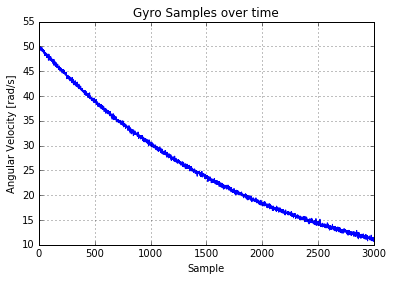

In [10]:
def generate_gyro_samples(w0=50, Ts=0.01, secs=5, **kwargs):
    # number of samples
    N = int(secs/Ts)
    
    # sample time vector
    n = np.arange(N)

    # generate the slowly-decaying signal
    alpha = kwargs['alpha']
    w = w0*np.exp(-alpha*(n*Ts))
    
    # Make some noise!
    sigma = kwargs['sigma']
    eta = sigma*np.random.randn(N)
    
    return w + eta

# Simulation parameters
P = {
    # initial angular velocity
    'w0': 50,
    
    # sample period
    'Ts': 0.01,
    
    # duration of simulation
    'secs': 30,
    
    # exponential decay parameter
    'alpha': 0.05,
    
    # std dev of AWGN
    'sigma': 0.25
}

# Generate samples of gyro measurements
w = generate_gyro_samples(**P)
fig = plt.figure()
plt.plot(w)
plt.title('Gyro Samples over time')
plt.grid(); plt.xlabel('Sample'); plt.ylabel('Angular Velocity [rad/s]')
plt.show()

#### Group Representation Class
To represent the orientation, which is an element of $S^1$, the following Python class is used. Internally, we use the unit-length complex number representation of group elements.

In [11]:
class S1:
    def __init__(self, theta=0):
        # The representation of the group element
        self.z = self.from_algebra(theta)
        
        # Also store the original element of the algebra
        self.theta = theta
    
    def from_algebra(self, theta):
        return np.exp(1j*theta)
    
    def to_algebra(self, z):
        return np.imag(np.log(z))
    
    def visualize(self, trajectory=np.array([])):
        """Visualize the group element on its manifold
        :param trajectory: optional list of group elements to plot
        """
        fig = plt.figure(figsize=(7,7))

        n = np.linspace(0, 2*np.pi, 100)
        plt.plot(np.cos(n), np.sin(n))
        plt.axis('square'), plt.axis([-2, 2, -2, 2]), plt.axis('off')
        
        if not trajectory.size:
            trajectory = np.array([self.z])

        x, y = np.real(trajectory), np.imag(trajectory)
        plt.scatter(x, y, s=50, c='r')
        
        plt.show()

Using this class, we can visualize the current orientation of the pencil on the manifold $S^1$.

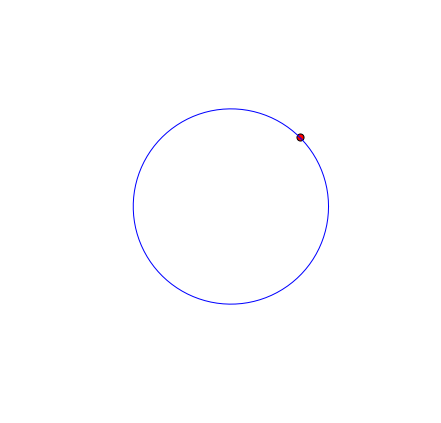

In [12]:
z = S1(theta=np.pi/4)
z.visualize()

#### Kinematics
The kinematics that describe the evolution of the pencil's orientation on the manifold is given by the first-order differential equation

\begin{equation}
\dot{z} = f(z) = j \dot{\theta} z = j \omega z,
\end{equation}

where $\theta \in \mathfrak{g} = \mathbb{R}$ and $z \in \mathcal{G} = S^1$.

#### Euler's Method (Naive)
We would like to use a computer to approximate this ODE. A common numerical method for solving first-order ODEs is Euler's Method, an explicit algorithm which uses the limit definition of a derivative to find the update rule

\begin{align}
\frac{z(t+h)-z(t)}{h} &= j\omega z(t)\\
z(t+T_s) &= z(t)+h\omega j z(t).
\end{align}

Assuming $\omega$ is constant in each sample interval and using $h=T_s$ (since that's when we have data to integrate), discretizing yields the digital algorithm

\begin{align}
z[n+1] &= z[n]+jT_s\omega[n] z[n]
\end{align}

In [13]:
class S1(S1):
    def euler_integration(self, w, Ts=0.01, secs=5, **kwargs):
        # convert seconds to steps
        steps = int(secs/Ts)
        
        # Store trajectory
        trajectory = np.zeros((steps+1,), dtype=complex)
        trajectory[0] = self.z

        for i in range(steps):
            self.z += Ts*( 1j*w[i]*self.z )
            trajectory[i+1] = self.z
            
        return trajectory

|z_final| = 3505702936142219243132615816680685479561858646016.0000


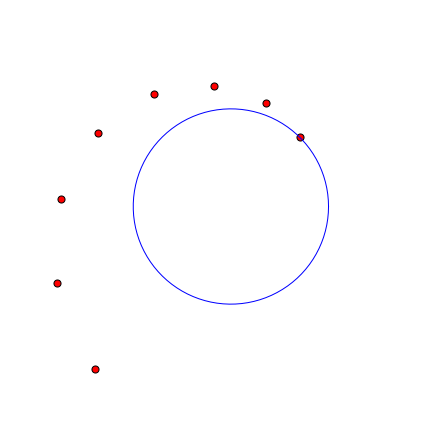

In [14]:
z = S1(theta=np.pi/4)
traj = z.euler_integration(w, **P)
print("|z_final| = {:.4f}".format(np.abs(traj[-1])))
z.visualize(traj)

The issue with this approach is that Euler's Method as it was implemented is only for Euclidean spaces. Note that the update steps calls for the addition of two group elements, which is not defined in $S^1$ and this scheme will cause the updated group element to lose the group property that $|z|=1$ and thus it will leave the manifold.

This is the core motivation for a study of Lie groups. Without the Lie group machinery, our estimation and control algorithms would suffer from numerical instability or costly normalization steps to reproject the updated value onto the manifold.

#### Runge-Kutta 4 (RK4)
Of course, Euler's Method is a first-order, rough approximation of any differential equation -- even in Euclidean space. We can build a much stronger argument for the need of Lie group integrators by investigating the results of integrating the differential equation using the Euclidean RK4 method. The RK4 method is given by

\begin{align}
y_{n+1}	&=	y_{n}+\frac{h}{6}\left(k_{1}+2k_{2}+2k_{3}+k4\right) \\
t_{n+1}	&=	t_{n}+h
 \end{align}
 
where
 
\begin{align}
k_{1} &= f\left(t_{n},y_{n}\right) \\
k_{2} &= f\left(t_{n}+\frac{h}{2},y_{n}+\frac{h}{2}k_{1}\right) \\
k_{3} &= f\left(t_{n}+\frac{h}{2},y_{n}+\frac{h}{2}k_{2}\right) \\
k_{4} &= f\left(t_{n}+h,y_{n}+hk_{3}\right)
\end{align}

In [15]:
class S1(S1):
    def rk4_integration(self, w, Ts=0.01, secs=5, **kwargs):
        # convert seconds to steps
        steps = int(secs/Ts)
        
        # Store trajectory
        trajectory = np.zeros((steps+1,), dtype=complex)
        trajectory[0] = self.z
        
        f = lambda i, t, z: 1j*w[i]*z

        for i in range(steps):
            t = i*Ts
            k1 = f(i, t, self.z)
            k2 = f(i, t + Ts/2, self.z + Ts/2*k1)
            k3 = f(i, t + Ts/2, self.z + Ts/2*k2)
            k4 = f(i, t + Ts  , self.z + Ts  *k3)
            self.z += (Ts/6)*(k1 + 2*k2 + 2*k3 + k4)
            trajectory[i+1] = self.z

        return trajectory

|z_final| = 0.9653


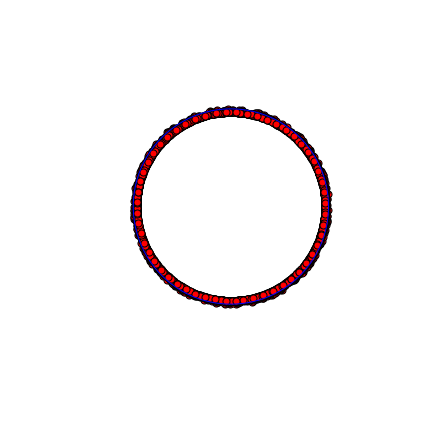

In [16]:
z = S1(theta=np.pi/4)
traj = z.rk4_integration(w, **P)
print("|z_final| = {:.4f}".format(np.abs(traj[-2])))
z.visualize(traj)

RK4 numerical integration does much better! But again, we can see that it breaks the constraint that $|z|=1$ and the updated elements eventually start leaving the manifold.

#### Simple Lie Integrator
Instead of using classic numerical techniques to approximate the solution to the $S^1$ kinematic equation, instead we can analytically solve the ODE and then discretize to obtain a digital implementation. This makes us feel better since it is rooted in mathematical theory.

Noting that the kinematics

\begin{equation}
\dot{z} = f(z) = j \omega z,
\end{equation}

is of the form

\begin{equation}
\frac{dz}{dt} + p(t)z(t) = q(t)
\end{equation}

with $p(t)=-j \omega$ and $q(t) = 0$, we can use the integrating factor  $exp(-\int_{t_{0}}^{t}j\theta\left(\tau\right)d\tau)$ to find a solution that satisfies this differential equation.

Making no assumptions about the content of the continuous signal $\omega(t)$, and using the integrating factor, we can write the kinematics as

\begin{equation}
\left(\dot{z}-j\omega(t)z\right)e^{-\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau} = 0.
\end{equation}

Using the product rule, this becomes

\begin{equation}
\frac{d}{dt}\left[ze^{-\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau}\right]=0.
\end{equation}

Taking the integral of both sides with respect to time gives

\begin{equation}
\int_{t_{0}}^{t}\frac{d}{d\tau}\left[ze^{-\int_{t_{0}}^{\tau}j\omega\left(\sigma\right)d\sigma}\right]d\tau=0,
\end{equation}

for which we can use the Fundamental Theorem of Calculus to find the solution

\begin{align}
z(t)e^{-\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau}-z(t_{0})e^{-\int_{t_{0}}^{t_{0}}j\omega\left(\tau\right)d\tau}	&=	0 \\
z(t)	&=	z(t_{0})e^{\int_{t_{0}}^{t}j\omega(\tau)d\tau}.
\end{align}

##### Digital Implementation: Zero-Order Hold
Because the gyro gives discrete samples every $T_s$ seconds, we need to discretize the solution for digital implementation. Let $t=nT_s$, $t_0=(n-1)T_s$ and use the notation $z[n]=z(nT_s)$. By using the concept of ZOH sampling, we assume that the signal is constant during the sample interval with $\omega[n]$. Therefore, $\int_{t_{0}}^{t}j\omega\left(\tau\right)d\tau=j\omega[n]T_{s}$ and

\begin{equation}
z[n]=z[n-1]e^{j\omega[n]T_{s}}
\end{equation}

In [17]:
class S1(S1):
    def lie_integration_zoh(self, w, Ts, secs=0, **kwargs):
        # convert seconds to steps
        steps = int(secs/Ts)
        
        # Store trajectory
        trajectory = np.zeros((steps+1,), dtype=complex)
        trajectory[0] = self.z
        
        for i in range(steps):
            self.z = self.z*np.exp(1j*w[i]*Ts)
            trajectory[i+1] = self.z
            
        return trajectory

|z_final| = 1.0000


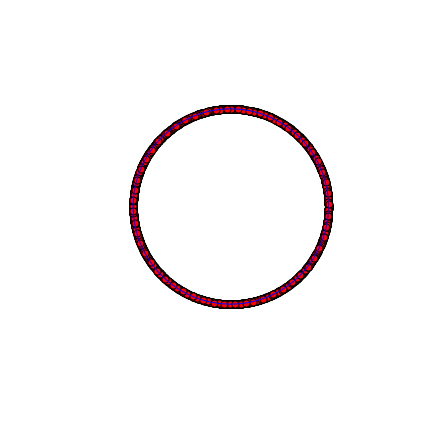

In [18]:
z = S1(theta=np.pi/4)
traj = z.lie_integration_zoh(w, **P)
print("|z_final| = {:.4f}".format(np.abs(traj[-1])))
z.visualize(traj)

Using the exponential mapping at each update, we see that the updated element stays on the manifold and maintains the geometric constraint $|z|=1$. Nice!

##### Digital Implementation: Delayed First-Order Hold
To increase our accuracy (especially for slower sampling rates), we assume that the signal is changing linearly between samples and apply a FOH. Note that for this scheme to implemented causally, it introduces a one sample lag.

## Control

We'll use as an example the azimuth control of a directional high-gain tracking antenna. The system state consists of the antenna direction $\Phi \in SO(2)$, and the angular velocity $\omega \in \mathbb{R}$. The input to the system is the torque $\tau$. The system dynamics are given by
\begin{eqnarray}
\dot{\Phi} &= \Phi \omega^\wedge \nonumber\\
\dot{\omega} &= -\frac{b}{I} \omega + \frac{1}{I} \tau \;,
\label{eq:dynamics}
\end{eqnarray}
where $I>0$ is the inertia and $b>0$ is a damping term. Following the discussion on solving differential equations, we will discretize these dynamics for computer simulation as
\begin{align}
\omega[k] &= \omega[k-1] + \left(-\frac{b}{I} \omega[k-1] + \frac{1}{I}\tau[k] \right) T_s \\
\Phi[k] &= \Phi[k-1] \circ \exp\left(\left(\omega[k] T_s\right)^\wedge\right)
\end{align}

We will use the native representation for elements of $SO(2)$ as $2\times2$ rotation matrices for our representation of the antenna orientation. This is implemented in the following Python class:

In [22]:
import numpy as np


class SO2:
    def __init__(self, G=np.eye(2)):
        self.mat = G

    def dot(self, rhs):
        return SO2(np.dot(self.mat, rhs.mat))

    @staticmethod
    def identity():
        return SO2(np.eye(2))

    def inverse(self):
        return SO2(self.mat.T)

    @staticmethod
    def exp(g):
        omega = SO2.vee(g)
        return SO2(np.array([[np.cos(omega), -np.sin(omega)], [np.sin(omega), np.cos(omega)]]))

    def log(self):
        theta = self.to_angle()
        return np.array([[0, -theta], [theta, 0]])

    @staticmethod
    def hat(omega):
        return np.array([[0.0, -omega],[omega, 0.0]])

    @staticmethod
    def vee(g):
        return g[1,0]

    def to_angle(self):
        return np.arctan2(self.mat[1,0], self.mat[0,0])

    @staticmethod
    def from_angle(theta):
        return SO2.exp(SO2.hat(theta))

    def visualize(self):
        pos = self.mat.dot(np.array([1.0, 0]))
        return pos[0], pos[1]

    def __str__(self):
        return self.mat.__str__()
    
    def __repr__(self):
        return self.mat.__str__()

We will set up our simulator to be able to accept a variety of controllers, which we will explore in the next sections. The simulator is implemented by the following class:

In [24]:
# %load files/simulator.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

class Simulator:
    def __init__(self, controller, commands=[0.0], command_duration=5.0):
        self.controller = controller

        # time
        self.dt = 0.01
        self.t = np.arange(0.0, command_duration*len(commands), self.dt)

        # system parameters
        self.I = 1.0
        self.b = 0.1

        # system state
        self.Phi = SO2()
        self.omega = 0.0

        # commands
        self.theta_c = np.zeros(self.t.shape)
        for i in range(len(commands)):
            self.theta_c[i*self.t.size//len(commands):(i+1)*self.t.size//len(commands)] = commands[i]

        # history
        self.theta_hist = np.zeros(self.t.shape)
        self.omega_hist = np.zeros(self.t.shape)
        self.tau_hist = np.zeros(self.t.shape)

    def animate(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal', xlim=[-1.2, 1.2], ylim=[-1.2,1.2])
        ax.axis('off')
        ax.set_title(self.controller.name)

        th = np.linspace(0, 2*np.pi, 100)
        ax.plot(np.cos(th), np.sin(th), 'k-')

        self.command_line = ax.plot([], [], 'ro', label='command')[0]
        self.actual_line = ax.plot([], [], 'bo', label='actual')[0]
        ax.legend(loc='center', numpoints=1)

        return animation.FuncAnimation(fig, self.step, frames=len(self.t), interval=int(1000*self.dt), blit=False, repeat=False)

    def step(self, k):
        # if the controller uses a manifold representation, convert the command to an element of SO(2)
        if self.controller.manifold:
            tau = self.controller.run(SO2.from_angle(self.theta_c[k]), self.Phi, self.omega)
        else:
            tau = self.controller.run(self.theta_c[k], self.Phi.to_angle(), self.omega)

        # propagate dynamics
        self.omega += (-self.b/self.I*self.omega + 1.0/self.I*tau)*self.dt
        self.Phi = self.Phi.dot(SO2.exp(SO2.hat(self.omega*self.dt)))

        # store history
        self.theta_hist[k] = self.Phi.to_angle()
        self.omega_hist[k] = self.omega
        self.tau_hist[k] = tau

        x_c, y_c = SO2.exp(SO2.hat(self.theta_c[k])).visualize()
        x, y = self.Phi.visualize()

        self.command_line.set_data(x_c, y_c)
        self.actual_line.set_data(x, y)

    def plot(self):
        plt.ioff()
        fig = plt.figure()

        ax = fig.add_subplot(311)
        ax.plot(self.t, self.theta_c, 'r-', label='command')
        ax.plot(self.t, self.theta_hist, 'b-', label='actual')
        ax.set_title(self.controller.name)
        ax.set_ylabel('theta (rad)')
        ax.legend()

        ax = fig.add_subplot(312)
        ax.plot(self.t, self.omega_hist, 'b-')
        ax.set_ylabel('omega (rad/s)')

        ax = fig.add_subplot(313)
        ax.plot(self.t, self.tau_hist, 'm-')
        ax.set_xlabel('time (s)')
        ax.set_ylabel('torque (N*m)')

        plt.show()

### Naive PID Control

We will begin by designing a simple PID controller following a more traditional approach without using a manifold representation for the orientation. Representing the orientation of the antenna by the angle $\theta \in \left(-\pi,\pi \right]$, we can write the equation of motion as
\begin{equation}
I \ddot{\theta} + b \dot{\theta} = \tau \;,
\end{equation}
from which we obtain the transfer function
\begin{equation}
\Theta(s) = \frac{1}{s\left( Is + b \right)} T(s) \;.
\end{equation}
For a simple PD controller the control law is given by
\begin{equation}
\tau = k_p \left(\theta^c - \theta\right) - k_d \omega \;,
\end{equation}
where $\theta^c$ is the commanded orientation. This yields the closed-loop transfer function
\begin{equation}
\Theta(s) = \frac{k_p}{I s^2 + (b + k_d)s + k_p} \Theta^c (s) \;,
\end{equation}
from which we can see that the system will be stable as long as $k_p>0$ and $b+k_d>0$, and that there will be zero steady-state error to a step input.

Choosing appropriate gains $k_p$ and $k_d$, we will simulate the response of this controller to step inputs as follows:

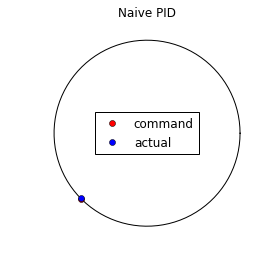

In [25]:

class PID_Naive:
    def __init__(self, kp, kd):
        self.name = "Naive PID"
        self.manifold = False

        self.kp = kp
        self.kd = kd

    def run(self, theta_c, theta, omega):
        return self.kp*(theta_c - theta) - self.kd*omega

sim = Simulator(PID_Naive(kp=2.0, kd=1.8), commands=[3*np.pi/4, -3*np.pi/4])
HTML(sim.animate().to_html5_video())

In [ ]:
sim.plot()

The controller appears to perform well under these conditions. However, note that when the commanded angle changes from $3\pi/4$ to $-3\pi/4$, the controller spins all the way around the circle clockwise the long way, instead of taking the shortest path counter-clockwise. This happens because we are representing the orientation as angles in the range $(-\pi,\pi]$, and this representation contains no information about the relationship between angles near the boundaries of this range.

In the example above this behavior might be annoying, but if not accounted for it can actually destabilize the system because if it overshoots and crosses the $-\pi$ or $\pi$ boundaries it doesn't know to back up and instead tries to go all the way around the circle again:

In [ ]:
sim = Simulator(PID_Naive(kp=2.0, kd=0.4), commands=[3*np.pi/4], command_duration=10.0)
HTML(sim.animate().to_html5_video())

In [ ]:
sim.plot()

Finally, if we were not careful about how we define our commanded angles, we can also get into trouble. For example, if we command we an angle greater than $2\pi$, the controller will want to go all the way around the circle once before settling on the desired orientation, but since the angle only goes up to $\pi$ it will never arrive there and will go unstable:

In [ ]:
sim = Simulator(PID_Naive(kp=2.0, kd=1.8), commands=[2*np.pi + np.pi/4])
HTML(sim.animate().to_html5_video())

In [ ]:
sim.plot()

For the case of $SO(2)$, all of these problems can be solved by adding in additional logic to carefully account for the angle-wrapping issues introduced by representing orientation as a scalar in the range $(-\pi,\pi]$. However, when we get to orientations in $SO(3)$ for three dimensions, that option will no longer be viable since orientation representations (such as Euler angles, quaternions, etc.) become much less trivial.

Additionally, these issue arise fundamentally because we are representing orientation as a member of a vector space, when in fact it is not. As will be shown in the next section, these issues disappear when representing the angle as a member of a Lie group, because all of the information that goes into the angle-wrapping logic is already captured by the group structure.

### Manifold PID control

For a PID controller on the manifold, we can no longer write the error using subtraction because the manifold is not a vector space. Instead, the error is a member of the Lie algebra $\mathfrak{so}(2)$, and is computed using the logarithmic mapping as
\begin{equation}
e = \log\left( \Phi^c \circ \Phi^{-1} \right)^\vee \;.
\end{equation}
We then write our control law as
\begin{equation} \label{eq:tau_1}
\tau = k_p e - k_d \omega \;.
\end{equation}

This is simulated as follows using the same gains and step inputs as for the naive PD controller:

In [ ]:
class PID_Manifold:
    def __init__(self, kp, kd):
        self.name = "Manifold PID"
        self.manifold = True

        self.kp = kp
        self.kd = kd

    def run(self, theta_c, theta, omega):
        u = self.kp*SO2.vee(theta_c.dot(theta.inverse()).log()) - self.kd*omega
        return u

sim = Simulator(PID_Manifold(kp=2.0, kd=1.8), commands=[3*np.pi/4, -3*np.pi/4])
HTML(sim.animate().to_html5_video())

We plot the results, converting the orientation to a scalar angle representation for the sake of visualization:

In [ ]:
sim.plot()

b

In [ ]:
sim = Simulator(PID_Manifold(kp=2.0, kd=0.4), commands=[3*np.pi/4], command_duration=10.0)
HTML(sim.animate().to_html5_video())

In [ ]:
sim.plot()

In addition, by also encoding the commanded angles as members of $SO(2)$, we avoid issues with commanded angles that are outside of the range $(-\pi,\pi]$:

In [ ]:
sim = Simulator(PID_Manifold(kp=2.0, kd=1.8), commands=[2*np.pi + np.pi/4])
HTML(sim.animate().to_html5_video())

In [ ]:
sim.plot()

Again this result looks strange in the plots, but this is because the plots do not encode the group structure that is accounted for in the controller and the result is correct.

## Convergence Analysis

In this section we show Lyapnov functions and make convergence arguments for proportional and proportional-derivative control.  

### Lyapunov Refresher
To set the stage, suppose that we have a first order kinematic equation $\dot{z}=z+u$ where $z$ is the state and $u$ is the control variable.  Suppose that the objective is for $z$ to follow $z_d$.  Define the Lyapunov function
$$
V = \frac{1}{2}\|z_d-z\|^2
$$
and take the time derivative of $V$ to get
$$
\dot{V} = (z_d-z)(\dot{z}_d-\dot{z}) = (z_d-z)(\dot{z}_d-z-u).
$$
Selecting the control as 
$$
u=\dot{z}_d - z + k_p(z_d-z)
$$
gives
$$
\dot{V} = -k_p(z_d-z)^2
$$ 
establishing the convergence of $z(t)$ to $z_d(t)$.

Now consider the second order dynamics
\begin{align*}
\dot{z} &= w \\
\dot{w} &= u,
\end{align*}
and again suppose that the objective is for $z$ to follow $z_d$.  Define the Lyapunov function
$$
V = \frac{k_p}{2}\|z_d-z\|^2 + \frac{1}{2}\|w\|^2,
$$
and take the time derivative to get
\begin{align*}
\dot{V} &= k_p (z_d-z)^\top(\dot{z}_d-\dot{z}) + w^\top \dot{w} \\
        &= -k_p (z_d-z)^\top w + w^\top u +  k_p (z_d-z)^\top\dot{z}_d \\
        &= w^\top \left( u -k_p (z_d-z) \right) +  k_p (z_d-z)^\top\dot{z}_d.
\end{align*}
Selecting the control variable as
\begin{equation}\label{eq:control_u}
u = k_p(z_d-z) - k_d w
\end{equation}
gives 
$$
\dot{V} = -k_d\|w\|^2 +  k_p (z_d-z)^\top\dot{z}_d.
$$
If $\dot{z}_d=0$ then the system converges to the set $E=\{(z, w): w=0\}$.  The largest invariant set in $E$ is characterized by the property that $w\equiv\dot{w}\equiv 0$, which from Equation \eqref{eq:control_u} implies that $z\equiv z_d$.   Therefore, the LaSalle invariance lemma implies that $z(t)\to z_d$.  If $\dot{z}_d$ is not zero, then a straightforward argument shows that the system trajectors are uniformly ultimately bounded with ultimate bound related to $\dot{z}_d$.


### Convergence analysis for first order kinematics

Our objective is to derive a similar controller over a lie group for the first order kinematic expression
$$
\dot{R}=R\omega^\wedge,
$$
where the objective is to drive $R$ to $R_d$.  Define the error $\tilde{R}=R_d^\top R$, and consider the Lyapunov function
\begin{equation} \label{eq:Lyapunov-1}
V = \frac{1}{2}\|I-\tilde{R}\|^2,
\end{equation}
where the matrix norm is defined as 
$$
\|A\| \stackrel{\triangle}{=} \langle\langle A, A \rangle\rangle
$$
and the matrix inner product is defined as
$$
\langle\langle A, B \rangle\rangle = tr\left[ A^\top B \right],
$$
and $tr\left[ \cdot \right]$ is the trace of the matrix.

We will have need of the following properties of the trace:

T.1. $tr\left[ A^\top \right]=tr\left[ A \right]$,

T.2. $tr\left[ AB \right] = tr\left[ BA \right]$,

T.3. $tr\left[ \alpha A + \beta B \right] = \alpha tr\left[ A \right] + \beta tr\left[ B \right]$ where $\alpha$ and $\beta$ are scalars, 

T.4. $tr\left[ AB \right] = 0$ when $A$ is a symmetric matrix and $B$ is a skew-symmetric matrix,

T.5. $tr\left[ a^\wedge b^\wedge \right] = -2a^\top b$, where $a, b \in \mathbb{R}^3$.

Using these properties we can rewrite equation \eqref{eq:Lyapunov-1} as
\begin{align*}
V &= \frac{1}{2}\|I-\tilde{R}\|^2 \\
  &= \frac{1}{2} tr\left[(I-\tilde{R})^\top(I-\tilde{R})\right] \\
  &= \frac{1}{2} tr\left[ I - \tilde{R} - \tilde{R}^\top + \tilde{R}^\top\tilde{R}\right] \\
  &= tr\left[I-\tilde{R}\right].
\end{align*}
Taking the derivative with respect to time gives
\begin{align}
\dot{V} &= -tr\left[ \dot{\tilde{R}} \right] \notag \\
        &= -tr\left[ \dot{R}_d^\top R + R_d^\top \dot{R} \right] \notag\\
        &= -tr\left[ \dot{R}_d^\top R + R_d^\top R \omega^\wedge \right] \notag\\
        &= -tr\left[ \dot{R}_d^\top R + \tilde{R} \omega^\wedge \right]. \label{eq:lyapunov_derivative_2}
\end{align}
Assume for the moment that $\dot{R}_d=0$, then 
\begin{equation}\label{eq:lyapunov_derivative_1}
\dot{V} = -tr\left[ \tilde{R}\omega^\wedge \right].
\end{equation}

Define the symetric and skew symmetric operators as
\begin{align*}
\mathbb{P}_s (A) &\stackrel{\triangle}{=} \frac{1}{2}(A+A^\top) \\
\mathbb{P}_a (A) &\stackrel{\triangle}{=} \frac{1}{2}(A-A^\top),
\end{align*}
and note that $A=\mathbb{P}_s(A)+\mathbb{P}_a(A)$.  Equation \eqref{eq:lyapunov_derivative_1} then become
\begin{align*}
\dot{V} &= -tr\left[ \mathbb{P}_s(\tilde{R})\omega^\wedge + \mathbb{P}_a(\tilde{R})\omega^\wedge \right] \\
        &= -tr\left[ \mathbb{P}_a(\tilde{R})\omega^\wedge \right],
\end{align*}
where the second line follows form property T.4 above.  If the control variable $\omega$ is selected as
\begin{equation}\label{eq:omega_1}
\omega = k_p \mathbb{P}^\top_a(\tilde{R})^\vee,
\end{equation}
then 
\begin{align*}
\dot{V} &= - k_p tr\left[ \mathbb{P}_a(\tilde{R})\mathbb{P}^\top_a(\tilde{R}) \right] \\
        &= - k_p tr\left[ \mathbb{P}_a^\top(\tilde{R})\mathbb{P}_a(\tilde{R}) \right] \\
        &= - k_p \langle\langle \mathbb{P}_a(\tilde{R}), \mathbb{P}_a(\tilde{R}) \rangle\rangle \\
        &= - k_p \| \mathbb{P}_a(\tilde{R}) \|^2,
\end{align*}
which is negative definite in $\tilde{R}$.  Note that since $\mathbb{P}_a^\top(\tilde{R})=-\mathbb{P}_a(\tilde{R})$, Equation \eqref{eq:omega_1} can be written as 
\begin{equation}\label{eq:omega_2}
\omega = -k_p \mathbb{P}_a(\tilde{R})^\vee.
\end{equation}
Also note that if $R=e^{\theta u^\wedge}$, then $\log{R} = \theta u^{\wedge}$.  Also, since for $R\in SO(3)$ we have 
$$
R=e^{\theta u^\wedge} = \cos\theta I + \sin\theta u^{\wedge} + (1-\cos\theta)uu^\top
$$
that 
\begin{align*}
\mathbb{P}_a(\tilde{R}) &= \frac{1}{2}\left[\cos\theta I + \sin\theta u^{\wedge} + (1-\cos\theta)uu^\top
-\cos\theta I + \sin\theta u^{\wedge} - (1-\cos\theta)uu^\top \right] \\
  &= \sin\theta u^\wedge,
\end{align*}
that Equation \eqref{eq:omega_2} is closely related to Equation \eqref{eq:tau_1}.

Now suppose that $\dot{R}_d \neq 0$, and let $\omega = -k_p\mathbb{P}_a(\tilde{R})^\vee + \Omega$ where $\Omega$ will be a feedforward term that cancels the effect of $\dot{R}_d$.  From Equation \eqref{eq:lyapunov_derivative_2} we have
$$
\dot{V} = -k_p\|\mathbb{P}_a(\tilde{R})\|^2 - tr\left[ \dot{R}_d^\top R + \tilde{R}\Omega^\wedge \right].
$$
The goal is to select $\Omega$ so that the second term is equal to zero.  Toward that end we have
\begin{align*}
& tr\left[ \dot{R}_d^\top R + \tilde{R}\Omega^\wedge \right] = 0 \\
\iff & -tr\left[ \tilde{R}\Omega^\wedge \right] = tr\left[ \dot{R}_d^\top R \right] \\
\iff & -tr\left[ \mathbb{P}_s(\tilde{R})\Omega^\wedge + \mathbb{P}_a(\tilde{R})\Omega^\wedge \right] = tr\left[ \dot{R}_d^\top R \right] \\
\iff & -tr\left[ \mathbb{P}_a(\tilde{R})\Omega^\wedge \right] = tr\left[ \dot{R}_d^\top R \right] \quad \text{(by T.4)}\\
\iff & 2(\mathbb{P}_a(\tilde{R})^\vee)^\top \Omega = tr\left[ \dot{R}_d^\top R \right] \quad \text{(by T.5)}.
\end{align*}
Therefore let
$$
\Omega = \begin{cases}
         \frac{1}{2} tr\left[ \dot{R}_d^\top R \right] \frac{\mathbb{P}_a(\tilde{R})^\vee}{\|\mathbb{P}_a(\tilde{R})^\vee\|^2}, & \quad \text{if} \quad \|\mathbb{P}_a(\tilde{R})^\vee\| \neq 0 \\
         0, & \quad \text{otherwise}
         \end{cases}.
$$
We note that $ \|\mathbb{P}_a(\tilde{R})^\vee\|=0$ iff $\tilde{R}=I$.  The above Lyapunov analysis guarantees that $R\to R_d$.

### Convergence analysis for second order dynamics

Now consider the second order dynamics
\begin{align*}
\dot{R} &= R\omega^\wedge \\
\dot{\omega} &= -\frac{b}{I}\omega + \frac{1}{I}\tau,
\end{align*}
and again let $\tilde{R}=R_d^\top R$.
  
Consider the Lyapunov function candidate
\begin{align*}
V &= \frac{k_p}{4I}\|I-\tilde{R}\|^2 + \frac{1}{2}\|\omega\|^2 \\
  &= \frac{k_p}{2I}tr\left[ I-\tilde{R} \right] + \frac{1}{2}\omega^\top \omega.
\end{align*}
Taking the time derivative of $V$ gives
\begin{align*}
\dot{V} &= -\frac{k_p}{2I} tr\left[ \dot{\tilde{R}} \right] + \omega^\top \dot{\omega} \\
        &= -\frac{k_p}{2I} tr\left[ \dot{R}_d^\top R + \tilde{R}\omega^\wedge \right] + \omega^\top (-\frac{b}{I}\omega + \frac{1}{I}\tau) \\
        &= -\frac{k_p}{2I} tr\left[ \dot{R}_d^\top R + (\mathbb{P}_s(\tilde{R})+\mathbb{P}_a(\tilde{R}))\omega^\wedge \right] + \omega^\top (-\frac{b}{I}\omega + \frac{1}{I}\tau) \\
        &= -\frac{k_p}{2I} tr\left[ \dot{R}_d^\top R + \mathbb{P}_a(\tilde{R})\omega^\wedge \right] + \omega^\top (-\frac{b}{I}\omega + \frac{1}{I}\tau) \\
        &= \frac{k_p}{I} \mathbb{P}_a^\top(\tilde{R})^\vee \omega + \omega^\top (-\frac{b}{I}\omega + \frac{1}{I}\tau) -\frac{k_p}{2I} tr\left[ \dot{R}_d^\top R \right]\\
        &= \omega^\top \left( \frac{k_p}{I} \mathbb{P}_a(\tilde{R})^\vee -\frac{b}{I}\omega + \frac{1}{I}\tau\right) -\frac{k_p}{2I} tr\left[ \dot{R}_d^\top R \right].
\end{align*}
Selecting the control input as
\begin{equation}\label{eq:tau_2}
\tau = -k_p \mathbb{P}_a(\tilde{R})^\vee - k_d\omega
\end{equation}
gives
$$
\dot{V} = -\left(\frac{b+k_d}{I}\right)\|\omega\|^2-\frac{k_p}{2I} tr\left[ \dot{R}_d^\top R \right].
$$
If $\dot{R}_d=0$ then $\dot{V}$ is negative semi-definite and system trajectories converge to the set $E=\{(R,\omega)|\omega=0\}$.  The largest invariant set in $E$ is characterized by $\omega(t)\equiv\dot{\omega}(t)\equiv 0$. From Equation \eqref{eq:tau_2} that implies that in the largest invariant set in $E$, $\tilde{R}=I$.  Therefore, by the LaSalle invariance principle $R(t) \to R^d$.  Again, Equation \eqref{eq:tau_2} is closely related to Equation \eqref{eq:tau_1}.  Straightforward arguments can be used to argue that when $\dot{R}_d\neq 0$ that the trajectories of the system are uniformly ultimately bounded with ultimate bound depending on $\dot{R}_d$.





## Optimal Control on SO(2)

In this section, we will explore optimal control on $SO(2)$.

 

### Optimal Control Introduction

In general, optimal control seeks to minimize the continuous-time cost function
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\u}{\mathbf{u}}$
$\newcommand{\b}{\mathbf{b}}$
$\newcommand{\h}{\mathbf{h}}$
$\newcommand{\lp}{\left(}$
$\newcommand{\rp}{\right)}$

\begin{eqnarray}
J = \h\lp\x(t_0), \x(t_f)\rp + \int_{t_0}^{t_f} \mathcal{L}\lp\x(t), \u(t)\rp dt
\label{eq:cost_function}
\end{eqnarray}

subject to dynamic constraints

\begin{eqnarray}
\dot{\mathbf{x}}(t) = f\left(\x(t), \u(t)\right),
\label{eq:dynamic_constraints}
\end{eqnarray}

algebraic _path constraints_
\begin{eqnarray}
\b\lp \x(t) \u(t) \rp \leq 0,
\label{eq:path_constraints}
\end{eqnarray}

and boundary conditions
\begin{eqnarray}
\h\lp \x(t_0), \x(t_f) \rp = 0
\label{eq:boundary_conditions}
\end{eqnarray}

where $\x(t)$ is the state, $\u(t)$ is the input, and $t$ is time with $t_0$ being the initial time, and $t_f$ the final time. $\h$ is known as the _endpoint cost_ and $\mathcal{L}$ is known as the _Lagrangian._  In many cases, $\b$ is given an inequality constraint, and therefore may not be zeros at the optimal solution, and there are sometimes many solutions to the above problem, therefore optimal control is known to be locally minimizing.

### Linear Quadratic Control

A special case of quadratic control is the Linear Quadratic Regulator (LQR).  In this case, the cost function \eqref{eq:cost_function} is defined as the following infinite-horizon quadratic expression
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\Q}{\mathbf{Q}}$
$\newcommand{\R}{\mathbf{R}}$
$\newcommand{\A}{\mathbf{A}}$
$\newcommand{\B}{\mathbf{B}}$
$\newcommand{\K}{\mathbf{K}}$

\begin{eqnarray}
J = \frac{1}{2} \int_0^{\infty}\lp \x^\top (t) \Q \x(t) + \u^\top(t)\R\u(t) \rp dt
\label{eq:LQR_cost}
\end{eqnarray}

subject to the linear, time-invariant first-order dynamic constraints

\begin{eqnarray}
\dot{\x}(t) = \A\x(t) + \B\u(t),
\end{eqnarray}

and the initial condition
\begin{eqnarray}
\x(t_0) = \x_0
\end{eqnarray}

where $\x(\infty) = 0$.

It has been shown that this problem can be solved with 

\begin{eqnarray}
\u(t) = -\K(t)\x(t)
\end{eqnarray}

where
\begin{eqnarray}
\K(t) = \R^{-1}\B^\top\S(t),
\end{eqnarray}

and $\S(t)$ is the solution to the algebraic Riccati equation (ARE) given as
\begin{eqnarray}
0 = -\S\A - \A^\top \S + \S\B\R^{-1}\B^\top\S-\Q
\end{eqnarray}

and can be solved for efficiently using modern scientific compution libraries such as `scipy` as shown below. As a side node, the LQR problem was originally solved by Rudolf Kalman [(_Kalman, 1960_)](https://www.cs.unc.edu/~welch/kalman/media/pdf/Kalman1960.pdf).

In [ ]:
from scipy.linalg import solve_continuous_are, inv
def lqr(A,B,Q,R):
    #first, try to solve the ricatti equation
    X = np.matrix(solve_continuous_are(A, B, Q, R))

    #compute the LQR gain
    K = np.matrix(inv(R)*(B.T*X))
    return K

### LQR on SO(2)
$\newcommand{\xr}{\x^c}$
$\newcommand{\xt}{\tilde{\x}}$
$\newcommand{\ur}{\u^c}$
$\newcommand{\ut}{\tilde{\u}}$

As it is formulated, LQR assumes that the state $\x$ is a vector, and therefore is not natively adapted to work on the $SO(2)$ manifold.  As such, we must perform control on the _error space_ between some reference trajectory and our current state.  

#### Error State Defintion

As before, our state $\x$ is defined as the tuple of the system's current position along the unit circle, expressed as a member of $SO(2)$ and the angular rate $\omega$

\begin{eqnarray}
\x = \begin{pmatrix} \Phi & \omega \end{pmatrix}^\top \;,
\end{eqnarray}

the input $\u$ is defined as the applied torque to the system $\tau$

\begin{eqnarray}
\u = \tau \;.
\end{eqnarray}

The dynamics of the system are

\begin{aligned}
\dot{\Phi} &= \omega \\
\dot{\omega} &= -\frac{b}{I} \omega + \frac{1}{I} \tau \;.
\end{aligned}

such that euler integration (assuming $\omega$ is constant over the interval $\Delta t$) is performed as

\begin{aligned}
\Phi(t + \Delta t) &= \Phi(t) \boxplus \Delta t \omega \\
\omega(t + \Delta t) &= \omega(t) + \lp\frac{1}{I} \tau - \frac{b}{I} \omega\rp\Delta t \;,
\end{aligned}

and where $\boxplus$ is defined as

\begin{aligned}
\Phi(t + \Delta t) &= \Phi(t) \boxplus \Delta t \omega \\
&= \exp(\omega \Delta t) \Phi(t) \; .
\end{aligned}

Let us define the error state, $\xt$ between our current state $\x$ and desired state $\xr$ as follows:

\begin{aligned}
\begin{pmatrix} \tilde{\Phi} \\ \tilde{\omega} \end{pmatrix} &= \begin{pmatrix} \log\lp \Phi^c \circ \Phi^{-1} \rp^\vee \\ \omega - \omega^c \end{pmatrix} \\
    \xt &= \x \boxminus \xr \;,
\end{aligned}

where the $\boxminus$ operator is defined to encapsulate the notion of "differencing" our desired and current state.  Similarly to when we calculated error $e$ in the definition of PID control, $\tilde{\Phi}\in\mathfrak{so}^\vee\cong \mathbb{R}^1$, which means that $\xt\in\mathbb{R}^2$.

We also must define our error state input, which is trivially defined as
\begin{aligned}
\ut = \u - \ur \;.
\end{aligned}



#### Error State Dynamics

Since we are performing LQR on the error state directly, we must find an expression for the error state dynamics.  Let's start with the definition of the error state:

\begin{aligned}
\xt &= \x \boxminus \xr
\end{aligned}

Taking the time derivative of both side leads to
$\newcommand{ddt}{\frac{d}{dt}}$
$\newcommand{ddP}{\frac{d}{d\Phi}}$
$\newcommand{ddPc}{\frac{d}{d\Phi^c}}$
$\newcommand{atan}{\textrm{atan}}$

\begin{eqnarray}
\dot{\xt} &= \dot{\x} - \dot{\xr}
\end{eqnarray}

The $\boxminus$ goes away because $\dot{\xt}$, $\dot{\x}$ and $\dot{\xr}$ are all in $\mathbb{R}^1$, and therefore can be differenced using the normal subtraction operator.

So, let us write out these dynamics in terms of their actual values

\begin{eqnarray}
\dot{\xt} &=& \dot{\x} - \dot{\xr} \nonumber\\
\begin{pmatrix} \dot{\tilde{\Phi}} \\ \dot{\tilde{\omega}} \end{pmatrix} 
&=& \begin{pmatrix} \omega - \omega^c \\ -\frac{b}{I} \omega + \frac{1}{I} \tau - -\frac{b}{I} \omega^c + \frac{1}{I} \tau^c \end{pmatrix} \nonumber\\ 
&=& \begin{pmatrix} \omega - \omega^c \\ \frac{b}{I}\lp\omega^c - \omega \rp + \frac{1}{I}\lp \tau - \tau^c \rp \end{pmatrix} \label{eq:error_state_dynamics}
\end{eqnarray}
We now need to write our dynamics in terms of only the current state and the error state - this will allow us to linearize our system about the error state.  To do this, first we must describe the desired state in terms of the current state and the error state

\begin{eqnarray}
\begin{pmatrix} \tilde{\Phi} \\ \tilde{\omega} \end{pmatrix} &=& \begin{pmatrix} \log\lp \Phi^c \circ \Phi^{-1} \rp^\vee \\ \omega - \omega^c \end{pmatrix} \nonumber \\
\begin{pmatrix} \exp\lp\tilde{\Phi^\wedge}\rp \\ \tilde{\omega} \end{pmatrix} &=& \begin{pmatrix} \Phi^c \circ \Phi^{-1} \\ \omega - \omega^c \end{pmatrix} \nonumber \\
\begin{pmatrix} \exp\lp\tilde{\Phi^\wedge}\rp\circ\Phi \\ \omega - \tilde{\omega} \end{pmatrix} &=& \begin{pmatrix} \Phi^c \\  \omega^c \end{pmatrix} \label{eq:des_as_error_and_current}
\end{eqnarray}

Lets now plug \eqref{eq:des_as_error_and_current} into \eqref{eq:error_state_dynamics}

\begin{eqnarray}
\begin{pmatrix} \dot{\tilde{\Phi}} \\ \dot{\tilde{\omega}} \end{pmatrix} 
&=& \begin{pmatrix} \omega - \lp\omega - \tilde{\omega}\rp \\ \frac{b}{I}\lp \lp \omega - \tilde{\omega} \rp - \omega \rp + \frac{1}{I}\lp \tau - \lp\tau - \tilde{\tau} \rp \rp \end{pmatrix} \nonumber \\
&=& \begin{pmatrix} \tilde{\omega} \\ -\frac{b}{I}\tilde{\omega}+ \frac{1}{I}\tilde{\tau} \end{pmatrix} \nonumber \\
\end{eqnarray}

#### Error State Jacobians

And now it is straight-forward to calculate our state and input Jacobians.  First let us calculate the partial derivative of our dynamics with respect to our state.
$\newcommand{dd}[1]{\frac{\partial}{\partial #1}}$
\begin{eqnarray}
\dd{\x}f\lp\x,\u\rp &=& \dd{\x} \begin{pmatrix} \tilde{\omega} \\ -\frac{b}{I}\tilde{\omega}+ \frac{1}{I}\tilde{\tau} \end{pmatrix} \nonumber \\
&=& 
\begin{pmatrix} 
    \dd{\tilde{\Phi}} \tilde{\omega} & \dd{\tilde\omega} \tilde{\omega}  \\
    \dd{\tilde{\Phi}} \lp-\frac{b}{I}\tilde{\omega}+ \frac{1}{I}\tilde{\tau}\rp  & \dd{\tilde{\omega}}\lp -\frac{b}{I}\tilde{\omega}+ \frac{1}{I}\tilde{\tau}\rp
\end{pmatrix} \nonumber \\
\A &=& 
\begin{pmatrix} 
    0 & 1  \\
    0 & -\frac{b}{I}
\end{pmatrix} \nonumber \\
\end{eqnarray}

Next, we will calculate the partial derivative of the dynamics with respect to the input
\begin{eqnarray}
\dd{\u}f\lp\x,\u\rp &=& \dd{\u} \begin{pmatrix} \tilde{\omega} \\ -\frac{b}{I}\tilde{\omega}+ \frac{1}{I}\tilde{\tau} \end{pmatrix} \nonumber \\
&=& 
\begin{pmatrix} 
    \dd{\tilde{\tau}} \tilde{\omega} \\
    \dd{\tilde{\tau}} \lp-\frac{b}{I}\tilde{\omega}+ \frac{1}{I}\tilde{\tau}\rp
\end{pmatrix} \nonumber \\
\B &=& 
\begin{pmatrix} 
    0 \\
    \frac{1}{I}
\end{pmatrix} \nonumber \\
\end{eqnarray}

This now forms the linearized system

$$
\dot{\xt} \approx \A \xt + \B \ut
$$

Now that we have a linearized system, we can perform LQR control.  Below is an LQR controller using this system

In [ ]:
class LQR_Manifold:
    def __init__(self, Q, R):
        self.name = "Manifold LQR"

        self.Q = Q
        self.R = R
        self.b = 0.1
        self.I = 1.0
        self.A = np.array([[0, 1],[0, -self.b/self.I]])
        self.B = np.array([[0],[1/self.I]])
        self.tau_c = 0.0
        self.omega_c = 0.0
        self.manifold = True
        self.K = lqr(self.A, self.B, self.Q, self.R)

    def run(self, theta_c, theta, omega):
        Phi_tilde = SO2.vee(SO2.log(theta_c.inverse().dot(theta)))
        omega_tilde = omega - self.omega_c
        xt = np.array([[Phi_tilde, omega_tilde]]).T
        tau_tilde = -self.K.dot(xt)[0,0]    
        tau = tau_tilde + self.tau_c
        return tau

Q = np.eye(2) * np.array([10.0, 1.0])
R = np.array([[0.1]])
sim = Simulator(LQR_Manifold(Q=Q, R=R), commands=[3*np.pi/4, -3*np.pi/4])
HTML(sim.animate().to_html5_video())

In [ ]:
sim.plot()

### Linear Model Predictive Control


LQR is a really powerful controller, but it has some shortcomings.  The most obvious being the inability to include path constraints - such as a maximum torque.  Let us assume that we have some maximum torque on our motor - let's see what happens if we simply saturate the LQR Controller to 10 Newtons

In [ ]:
import time
class LQR_Manifold_Saturated(LQR_Manifold): 
    def __init__(self, Q, R):
        LQR_Manifold.__init__(self,Q,R)

    def run(self, theta_c, theta, omega):
        u = LQR_Manifold.run(self, theta_c, theta, omega)
        if u > 10: u = 10
        elif u < -10: u = -10
        return u

Q = np.eye(2) * np.array([10.0, 1.0])
R = np.array([[0.1]])
start = time.time()
sim = Simulator(LQR_Manifold_Saturated(Q=Q, R=R), commands=[3*np.pi/4, -3*np.pi/4])
HTML(sim.animate().to_html5_video())
end = time.time()
print "took", end - start, "seconds"

In [ ]:
sim.plot()

In this case, there are actually no obvious drawbacks to performing saturation, however on more complicated systems saturation can cause major problems.  To get around these, let us look at performing linear model-predictive control (LMPC).

In our case, we will seek to solve the following optimization problem

$\newcommand{norm}[1]{\left\lVert#1\right\rVert}$

\begin{eqnarray}
\min_\ut & & \sum_{k=0}^{N-1} \xt[k]^\top \Q \xt[k] + \ut[k]^\top \R \u[k] \nonumber \\
s.t.:& & -10 \leq \u[k] \leq 10 \quad k = 0, \ldots, N-1 \nonumber \\
     & & \xt[k+1] = \A\xt[k] + \B\ut[k] \quad k=0, \ldots, N-1 \nonumber \\
     & & x[0] = x_0 \nonumber
\label{eq:cost_function}
\end{eqnarray}

This is actually relatively easy to implement with the Python Convex Optimization Library `cvxpy`.

In [ ]:
import cvxpy
import time

class LMPC_Manifold:
    def __init__(self, Q, R):
        self.name = "Manifold LMPC"

        self.Q = Q
        self.R = R
        self.b = 0.1
        self.I = 1.0
        self.A = np.array([[0, 1],[0, -self.b/self.I]])
        self.B = np.array([[0],[1/self.I]])
        self.tau_c = 0.0
        self.omega_c = 0.0
        self.manifold = True
        self.N = 50

    def run(self, theta_c, theta, omega):
        x = cvxpy.Variable(2, self.N+1)
        u = cvxpy.Variable(1, self.N)
           
        Phi_tilde = SO2.vee(SO2.log(theta_c.inverse().dot(theta)))
        omega_tilde = omega - self.omega_c
        xt0 = np.array([[Phi_tilde, omega_tilde]]).T
        
        cost = 0.0
        constr = []
        for k in range(self.N):
            cost += cvxpy.quad_form(x[:,k], self.Q)
            cost += cvxpy.quad_form(u[:,k], self.R)
            constr.append(x[:,k+1] == x[:,k] + 0.01*(self.A * x[:,k] + self.B*u[:,k]))
            constr += [u[:,k] < 10]
            constr += [u[:,k] > -10]
        constr += [x[:,0] == xt0]
        prob = cvxpy.Problem(cvxpy.Minimize(cost), constr)
        prob.solve(verbose=False)
        
        tau_tilde = np.array(u.value)[0,0]  
        tau = tau_tilde + self.tau_c
        return tau

Q = np.eye(2) * np.array([10.0, 1.0])
R = np.array([[0.1]])
# Watch out - this takes about 4 minutes on my i7 laptop
start = time.time()
sim = Simulator(LMPC_Manifold(Q=Q, R=R), commands=[3*np.pi/4, -3*np.pi/4])
HTML(sim.animate().to_html5_video())
end = time.time()
print "took", end - start, "seconds"

In [ ]:
sim.plot()

While this worked, there are some obvious drawbacks to this implementation - the largest being the absurd computational requirements.  Running the above examples takes about 4 minutes on my i7 laptop, whereas the saturated LQR controller takes 14 seconds.  Other drawbacks include the linearization requirement, however MPC allows you to be very flexible with your modeling and constraint design which is often necessary for real-world performance.

## Estimation

Devon